<img src = '../imgs/pet_tree.jpg' width = 600>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

/Users/argonneed/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
# Load the dataset
df = pd.read_csv('../data/spotify_all_genres_tracks.csv')

# Display the first few rows
df.head()

,track_id,playlist_url,playlist_name,track_name,track_popularity,artist_name,album,album_cover,artist_genres,artist_popularity,...,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,genre
0,4Gia17DzXBhYFbYiJj6SyW,https://open.spotify.com/playlist/7qACZGMjyo64...,The Sound of Blues,Working Man,51,Otis Rush,Mourning In The Morning,https://i.scdn.co/image/ab67616d0000b273fea221...,"['blues', 'blues rock', 'chicago blues', 'elec...",41,...,1,0.0436,0.492,0.000418,0.204,0.841,103.355,147800,4,blues
1,1BjYNhg7JhVfQdxqEThBwn,https://open.spotify.com/playlist/7qACZGMjyo64...,The Sound of Blues,Long Way Home,38,"Clarence ""Gatemouth"" Brown",Long Way Home,https://i.scdn.co/image/ab67616d0000b2730e1f13...,"['blues', 'blues rock', 'memphis blues', 'mode...",33,...,0,0.0380,0.910,0.048000,0.120,0.425,78.033,338333,4,blues
2,2Cg3GUkhjX96nO4p2WRlIa,https://open.spotify.com/playlist/7qACZGMjyo64...,The Sound of Blues,She's A Sweet One,49,Junior Wells,"Calling All Blues - The Chief, Profile & USA R...",https://i.scdn.co/image/ab67616d0000b27399b18c...,"['blues', 'blues rock', 'chicago blues', 'elec...",41,...,1,0.0542,0.150,0.026500,0.202,0.713,122.863,181786,4,blues
3,5bC6ONDsL88snGN6QasjZH,https://open.spotify.com/playlist/7qACZGMjyo64...,The Sound of Blues,Help Me,59,Sonny Boy Williamson II,More Real Folk Blues,https://i.scdn.co/image/ab67616d0000b273b48c81...,"['acoustic blues', 'blues', 'blues rock', 'chi...",46,...,0,0.0430,0.597,0.021300,0.610,0.771,114.216,188200,4,blues
4,2TKykeHeVKsBqZC8M3SKcN,https://open.spotify.com/playlist/7qACZGMjyo64...,The Sound of Blues,Take Out Some Insurance,51,Jimmy Reed,Rockin' With Reed,https://i.scdn.co/image/ab67616d0000b2739b7573...,"['blues', 'blues rock', 'chicago blues', 'elec...",42,...,1,0.0513,0.663,0.000000,0.122,0.566,111.330,143332,4,blues


In [3]:
# Basic statistics of the dataset
df.describe()

,track_popularity,artist_popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
count,9198.000000,9198.000000,9198.000000,9198.000000,9198.000000,9198.000000,9198.000000,9198.000000,9198.000000,9198.000000,9198.000000,9198.000000,9198.000000,9.198000e+03,9198.000000
mean,48.891716,51.161883,0.595363,0.535862,5.359209,-10.706267,0.596434,0.084681,0.362225,0.227429,0.170279,0.502993,116.589396,2.532825e+05,3.896934
std,17.501544,16.080915,0.192927,0.273231,3.558963,6.573201,0.490639,0.081614,0.368888,0.350817,0.139707,0.265940,29.270118,1.019732e+05,0.402003
min,0.000000,0.000000,0.000000,0.000885,0.000000,-47.001000,0.000000,0.000000,0.000002,0.000000,0.014500,0.000000,0.000000,3.033300e+04,0.000000
25%,38.000000,42.000000,0.474000,0.334000,2.000000,-13.255750,0.000000,0.038200,0.030425,0.000002,0.090100,0.282000,93.983000,1.897008e+05,4.000000
50%,49.000000,52.000000,0.621000,0.578500,6.000000,-8.761500,1.000000,0.049000,0.191000,0.001675,0.116000,0.519000,117.922500,2.282670e+05,4.000000
75%,61.000000,62.000000,0.744000,0.757000,8.000000,-6.128250,1.000000,0.087500,0.731000,0.461000,0.198000,0.724000,132.697250,2.864568e+05,4.000000
max,95.000000,100.000000,0.984000,0.999000,11.000000,1.342000,1.000000,0.827000,0.996000,0.983000,0.979000,0.986000,216.090000,1.430840e+06,5.000000


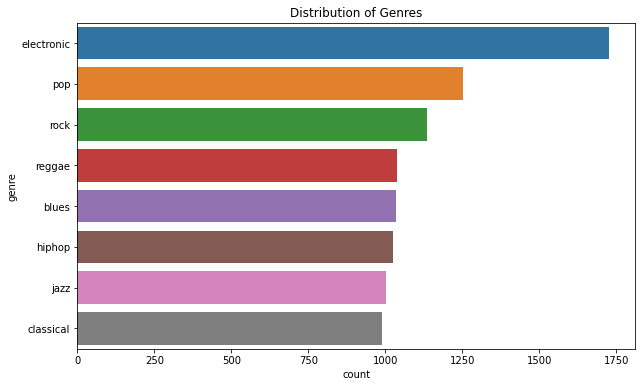

In [4]:
# Visualize the distribution of genres
plt.figure(figsize=(10, 6))
sns.countplot(y='genre', data=df, order=df['genre'].value_counts().index)
plt.title('Distribution of Genres')
plt.show()

In [5]:
# Feature selection and preprocessing
# Assuming 'genre' is the target variable and the rest are features
X = df.drop('genre', axis=1)
y = df['genre']

In [6]:
filtered_df = df[(df['genre'] == 'hiphop') | (df['genre'] == 'rock')]

In [7]:
filtered_df.head()

,track_id,playlist_url,playlist_name,track_name,track_popularity,artist_name,album,album_cover,artist_genres,artist_popularity,...,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,genre
3026,1SyQ6t9RdRBK0QUCS6a797,https://open.spotify.com/playlist/6MXkE0uYF4Xw...,The Sound of Hip Hop,Hip Hop Hooray,65,Naughty By Nature,19 Naughty III,https://i.scdn.co/image/ab67616d0000b273afbd83...,"['east coast hip hop', 'gangster rap', 'hardco...",57,...,0,0.101,0.10200,0.000000,0.2720,0.765,99.200,267267,4,hiphop
3027,3Ti0GdlrotgwsAVBBugv0I,https://open.spotify.com/playlist/6MXkE0uYF4Xw...,The Sound of Hip Hop,Can I Kick It?,70,A Tribe Called Quest,People's Instinctive Travels and the Paths of ...,https://i.scdn.co/image/ab67616d0000b2734ba1fe...,"['alternative hip hop', 'conscious hip hop', '...",65,...,1,0.274,0.17300,0.000699,0.1290,0.744,96.662,251573,4,hiphop
3028,0IVAlb0cFCH1cQ974iR1TU,https://open.spotify.com/playlist/6MXkE0uYF4Xw...,The Sound of Hip Hop,Ms. Fat Booty,71,Mos Def,Black On Both Sides,https://i.scdn.co/image/ab67616d0000b27389b56f...,"['alternative hip hop', 'conscious hip hop', '...",64,...,1,0.189,0.14800,0.000000,0.1640,0.869,90.438,223547,4,hiphop
3029,4G3dZN9o3o2X4VKwt4CLts,https://open.spotify.com/playlist/6MXkE0uYF4Xw...,The Sound of Hip Hop,Passin' Me By,68,The Pharcyde,Bizarre Ride II The Pharcyde,https://i.scdn.co/image/ab67616d0000b2739ec4ab...,"['alternative hip hop', 'hardcore hip hop', 'h...",58,...,0,0.266,0.09030,0.000002,0.2650,0.613,87.059,303493,4,hiphop
3030,48ZUwXrEOhaXLCxvmRYhZv,https://open.spotify.com/playlist/6MXkE0uYF4Xw...,The Sound of Hip Hop,Don't Sweat The Technique,60,Eric B. & Rakim,Don't Sweat The Technique,https://i.scdn.co/image/ab67616d0000b273d55241...,"['alternative hip hop', 'bboy', 'east coast hi...",52,...,1,0.158,0.00556,0.001710,0.0801,0.809,105.848,262800,4,hiphop


In [16]:
# Select relevant numerical features for prediction
numerical_features = [
    'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence'
]

# Drop irrelevant columns
df_relevant = filtered_df[numerical_features + ['genre']].copy()
df_relevant.head()

,speechiness,acousticness,instrumentalness,liveness,valence,genre
3026,0.101,0.10200,0.000000,0.2720,0.765,hiphop
3027,0.274,0.17300,0.000699,0.1290,0.744,hiphop
3028,0.189,0.14800,0.000000,0.1640,0.869,hiphop
3029,0.266,0.09030,0.000002,0.2650,0.613,hiphop
3030,0.158,0.00556,0.001710,0.0801,0.809,hiphop


In [12]:
def plot_song_features(song_title):
    
    song_data = df_relevant[df_relevant['track_name'].str.lower() == song_title.lower()]
    
    if song_data.empty:
        print(f"Song titled '{song_title}' not found in the dataset.")
        return
    
    # Drop non-feature columns
    features = song_data.drop(['track_name'], axis=1).iloc[0]
    
    # Plot the features
    plt.figure(figsize=(12, 6))
    features.plot(kind='barh')
    plt.title(f"Features of '{song_title}'")
    plt.ylabel('Feature Value')
    plt.xlabel('Feature')
    plt.xticks(rotation=45)
    plt.show()

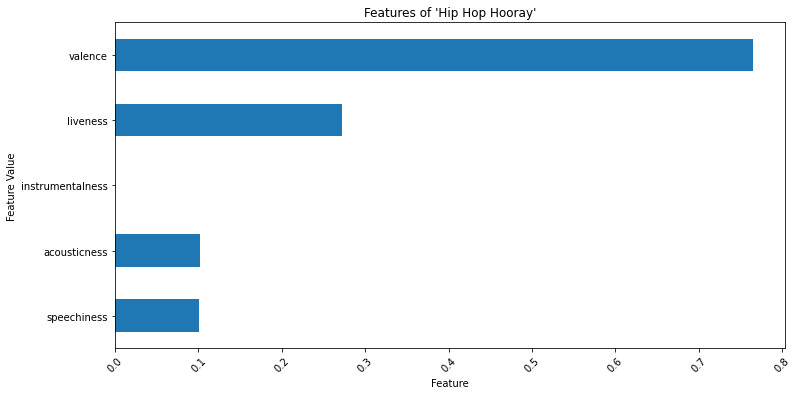

In [10]:
plot_song_features('Hip Hop Hooray')

In [17]:
# Standardize numerical features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df_relevant[numerical_features])
scaled_features

array([[-0.2739879 , -0.19909235, -0.27957149,  0.41322577,  0.83894768],
       [ 1.26688267,  0.18048535, -0.27434714, -0.44158923,  0.7430329 ],
       [ 0.50980754,  0.04683123, -0.27957149, -0.23236877,  1.31395423],
       ...,
       [-0.82709808,  0.15375452, -0.25954108, -0.49538877,  0.46442329],
       [-0.66855764, -0.74241239, -0.27871945, -0.07097014,  0.0579273 ],
       [-0.63471193,  0.22860083, -0.27708264, -0.86062791, -1.06564589]])

In [18]:
# Encode target variable
label_encoder = LabelEncoder()

df_relevant['genre'] = label_encoder.fit_transform(df_relevant['genre'])

NameError: name 'LabelEncoder' is not defined

In [19]:
# Split the data into training and testing sets
X = scaled_features
y = df_relevant['genre']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Logistic Regression Accuracy: 0.87
Decision Tree Accuracy: 0.81
Random Forest Accuracy: 0.88
Support Vector Machine Accuracy: 0.87
K-Nearest Neighbors Accuracy: 0.86


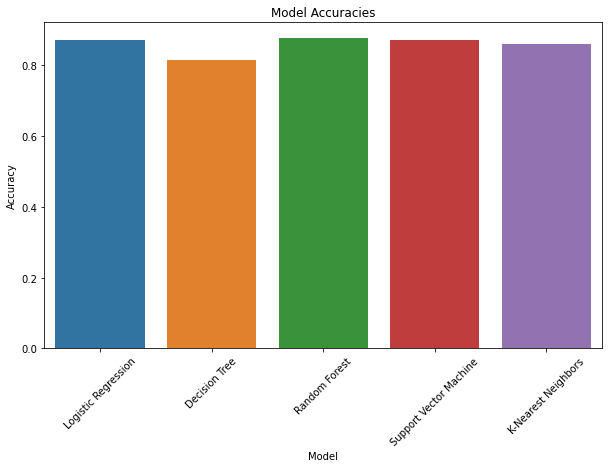

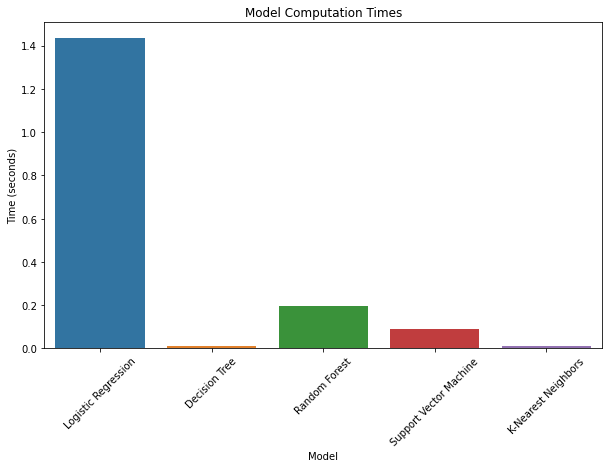

In [20]:
# Initialize models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Support Vector Machine": SVC(),
    "K-Nearest Neighbors": KNeighborsClassifier()
}

# Train and evaluate models
model_accuracies = {}
model_times = {}

for model_name, model in models.items():
    start_time = time.time()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    end_time = time.time()
    
    accuracy = accuracy_score(y_test, y_pred)
    model_accuracies[model_name] = accuracy
    model_times[model_name] = end_time - start_time
    
    print(f"{model_name} Accuracy: {accuracy:.2f}")


# Visualize model accuracies
plt.figure(figsize=(10, 6))
sns.barplot(x=list(model_accuracies.keys()), y=list(model_accuracies.values()))
plt.title('Model Accuracies')
plt.ylabel('Accuracy')
plt.xlabel('Model')
plt.xticks(rotation=45)
plt.show()

# Visualize computation times
plt.figure(figsize=(10, 6))
sns.barplot(x=list(model_times.keys()), y=list(model_times.values()))
plt.title('Model Computation Times')
plt.ylabel('Time (seconds)')
plt.xlabel('Model')
plt.xticks(rotation=45)
plt.show()